[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://github.com/CodingPro777/AAI-530-GROUP-1/edit/main/final_project_code.ipynb
)


# USD AAI-530 Group 1 final project - Machine Learning with IoT(FitBit Fitness)

*Group 1 members: Ali Abdul-Hameed, Jack Kim, Jinyuan He*


# 1. Data cleaning & EDA

## 1.1 Loading dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# upload dataset zip file to google drive if not exist
import os
google_drive_path = '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1'

zip_file_path = google_drive_path + '/archive.zip'

if not os.path.isfile(zip_file_path):
  from google.colab import files
  uploaded = files.upload()
  !mv archive.zip '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1'


!unzip '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1/archive.zip'

Archive:  /content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1/archive.zip
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase

In [3]:
# combine two months dataset into one
import pandas as pd

raw_daily_activity_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')]
)

raw_weight_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')]
)

raw_hr_sec_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')]
)

raw_calories_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')]
)

raw_intensities_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv')]
)

raw_mets_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')]
)

raw_sleep_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')]
)


raw_step_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv')]
)

## 1.2 Make up dataset for calories prediction

In [4]:
calories_df = raw_calories_min_df.merge(
    raw_intensities_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

calories_df = calories_df.merge(
    raw_mets_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

calories_df = calories_df.merge(
    raw_step_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

calories_df['ActivityMinute'] = pd.to_datetime(
    calories_df['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p'
)

raw_weight_df['Date'] = pd.to_datetime(
    raw_weight_df['Date'],
    format='%m/%d/%Y %I:%M:%S %p'
)

# sort these two datasets
calories_df = calories_df.sort_values(
    ['ActivityMinute', 'Id']
).reset_index(drop=True)

raw_weight_df = raw_weight_df.sort_values(
    ['Date', 'Id']
).reset_index(drop=True)

calories_merged_df = pd.merge_asof(
    calories_df,
    raw_weight_df[['Id', 'Date', 'WeightPounds', 'BMI']],
    left_on='ActivityMinute',
    right_on='Date',
    by='Id',                # match same user
    direction='backward'    # use latest weight BEFORE activity time
)

In [5]:
calories_merged_df.isna().sum()

,0
Id,0
ActivityMinute,0
Calories,0
Intensity,0
METs,0
Steps,0
Date,2296122
WeightPounds,2296122
BMI,2296122


In [6]:
# Forward fill weight-related columns by user
cols_to_fill = ['WeightPounds', 'BMI']

calories_merged_df[cols_to_fill] = (
    calories_merged_df
        .groupby('Id')[cols_to_fill]
        .transform(lambda x: x.ffill().bfill())
)

In [7]:
calories_merged_df.isna().sum()

,0
Id,0
ActivityMinute,0
Calories,0
Intensity,0
METs,0
Steps,0
Date,2296122
WeightPounds,1848540
BMI,1848540


In [8]:
# remove the data which doesn't have WeightPounds, BMI
calories_merged_df.dropna(subset=['WeightPounds', 'BMI'], inplace=True)
calories_merged_df.drop(columns=['Date'], inplace=True)
calories_merged_df.isna().sum()

,0
Id,0
ActivityMinute,0
Calories,0
Intensity,0
METs,0
Steps,0
WeightPounds,0
BMI,0


In [9]:
number_cols = [
    'Calories',
    'Intensity',
    'METs',
    'Steps',
    'WeightPounds',
    'BMI'
]

calories_merged_df[number_cols] = calories_merged_df[number_cols].apply(pd.to_numeric)

In [10]:
pd.options.display.float_format = '{:.0f}'.format
calories_merged_df.describe()

,Id,ActivityMinute,Calories,Intensity,METs,Steps,WeightPounds,BMI
count,1069080,1069080,1069080,1069080,1069080,1069080,1069080,1069080
mean,4687112516,2016-04-10 21:02:08.603658752,2,0,15,6,176,28
min,1503960366,2016-03-12 00:00:00,0,0,0,0,116,21
25%,2873212765,2016-03-27 11:12:00,1,0,10,0,137,24
50%,4558609924,2016-04-12 00:45:00,1,0,10,0,167,26
75%,5577150313,2016-04-24 18:27:00,1,0,12,0,204,28
max,8877689391,2016-05-12 15:59:00,19,3,157,207,294,48
std,2274543825,NaN,1,1,13,19,48,7


### 1.2.1 Check minute-level time continuity in the dataset

In [11]:
# Sort by value
calories_merged_df = calories_merged_df.sort_values(['Id', 'ActivityMinute'], ascending=True)

# Remove duplicated data
calories_merged_df = calories_merged_df.drop_duplicates(subset=['Id', 'ActivityMinute'])

# Check minute-level time continuity in the dataset
calories_merged_df.groupby('Id')['ActivityMinute'].diff().value_counts().head()

,count
ActivityMinute,
0 days 00:01:00,1017763
0 days 04:01:00,2
3 days 01:01:00,1
0 days 02:01:00,1
0 days 14:01:00,1


#### PS: The minute-level activity data is largely continuous, with over 99% of consecutive records occurring at 1-minute intervals. A small number of duplicate timestamps and occasional multi-hour gaps were observed, likely due to device synchronization or user inactivity.

In [12]:
# We mark time gaps in the data so that the records can be separated into sessions or removed when training time-series models.
calories_merged_df['minute_gap'] = (
    calories_merged_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
      .div(60)
)

calories_merged_df['has_gap'] = (calories_merged_df['minute_gap'] > 1).astype(int)

### 1.2.2 EDA

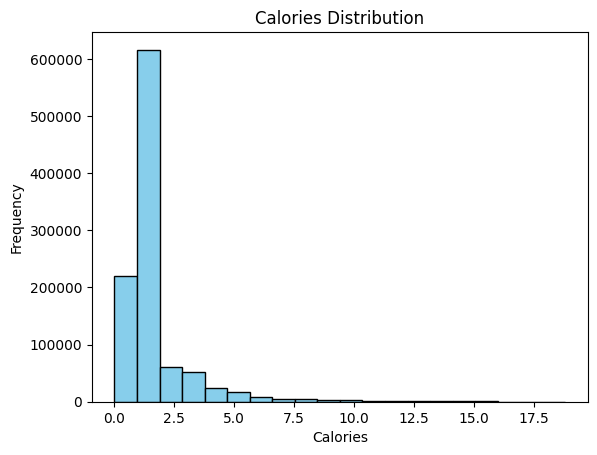

In [13]:
import matplotlib.pyplot as plt

plt.hist(calories_merged_df['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Calories Distribution')
plt.show()

array([[<Axes: title={'center': 'Steps'}>,
        <Axes: title={'center': 'METs'}>],
       [<Axes: title={'center': 'Intensity'}>, <Axes: >]], dtype=object)

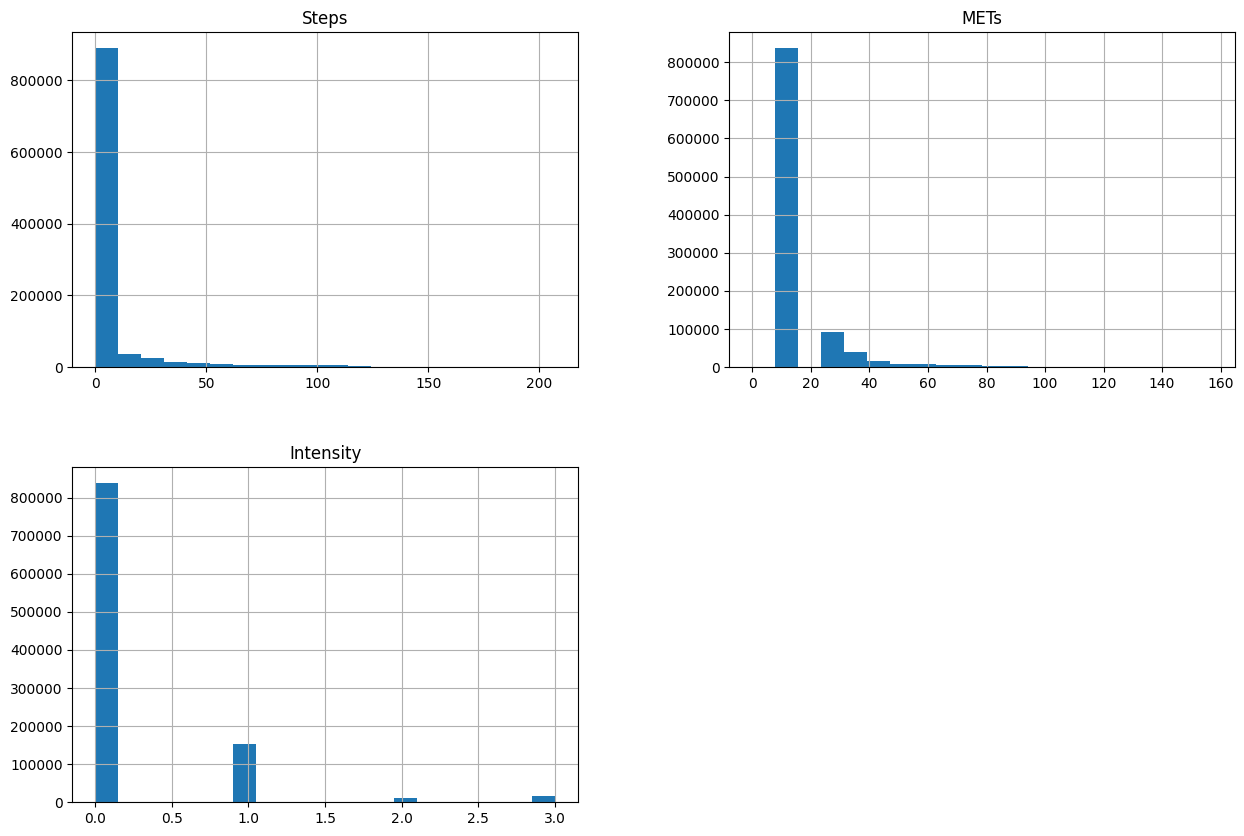

In [14]:
calories_merged_df[['Steps', 'METs', 'Intensity']].hist(bins=20, figsize=(15,10))

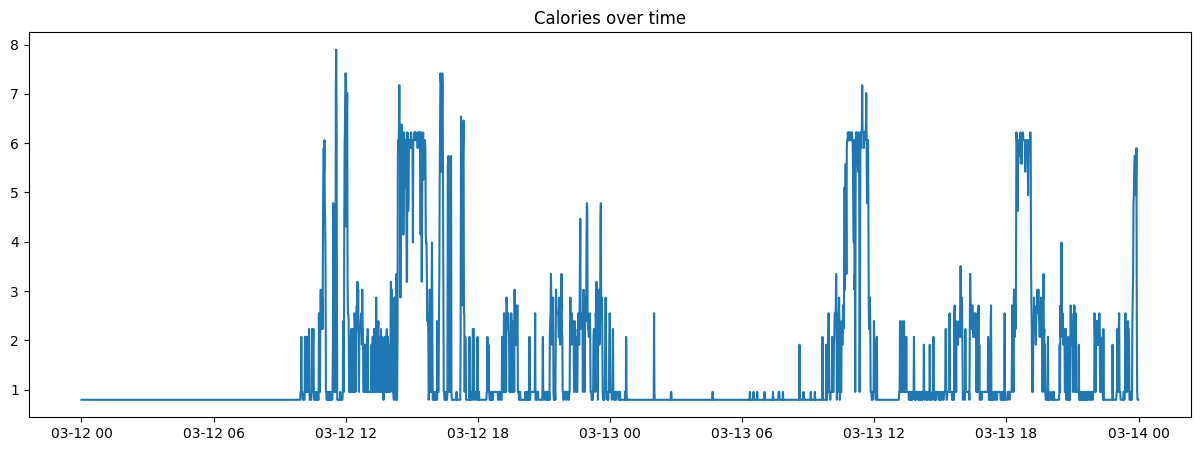

In [15]:
uid = calories_merged_df['Id'].iloc[0]

sample = (
    calories_merged_df[calories_merged_df['Id'] == uid]
        .head(2 * 24 * 60)
)
plt.figure(figsize=(15, 5))
plt.plot(sample['ActivityMinute'], sample['Calories'], label='Calories')
plt.title('Calories over time')
plt.show()

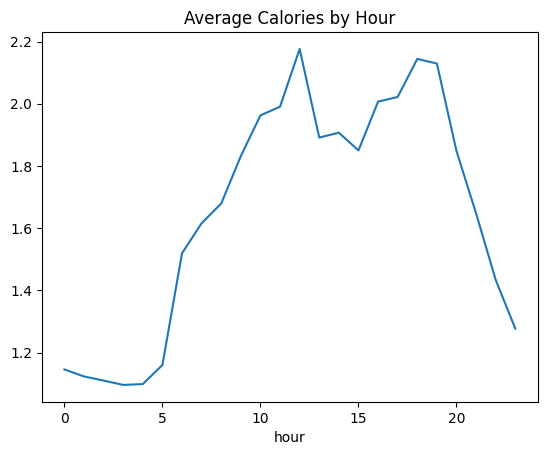

In [16]:
calories_merged_df['hour'] = calories_merged_df['ActivityMinute'].dt.hour

calories_merged_df.groupby('hour')['Calories'].mean().plot(kind='line')
plt.title('Average Calories by Hour')
plt.show()

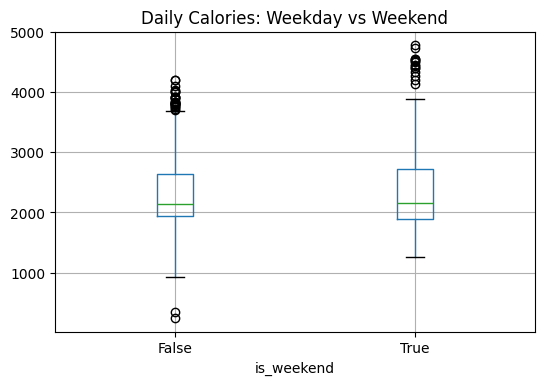

In [17]:
df = calories_merged_df.copy()

df["dayofweek"] = df["ActivityMinute"].dt.dayofweek
# Monday=0, Sunday=6
df["is_weekend"] = df["dayofweek"].isin([5, 6])

daily = (
    df.groupby(["Id", "is_weekend", df["ActivityMinute"].dt.date])["Calories"]
      .sum()
      .reset_index()
)

daily.boxplot(column="Calories", by="is_weekend", figsize=(6,4))
plt.title("Daily Calories: Weekday vs Weekend")
plt.suptitle("")
plt.show()

#### Interpretation

**1. Calories Distribution**
From the calories distribution, we observe that most calories burned per minute fall within the range of approximately 0 to 1.5, forming a right-skewed distribution. This indicates that while most minutes involve low energy expenditure, users occasionally reach much higher calorie burn levels, likely during periods of exercise. Similarly, Steps, METs, and Intensity exhibit comparable right-skewed patterns, reflecting sporadic bursts of higher activity.

**2. Hourly Activity Pattern**
The hourly average plot shows that calorie expenditure is lowest during nighttime hours and higher during daytime, corresponding to typical human activity and rest cycles. This pattern is consistent with expected daily routines and supports the validity of the data.

**3. Weekday vs. Weekend Comparison**
The boxplot comparison indicates that daily calories burned on weekends are slightly higher than on weekdays. This suggests that people may engage in more outdoor or leisure activities on weekends, leading to increased overall energy expenditure compared to weekdays.

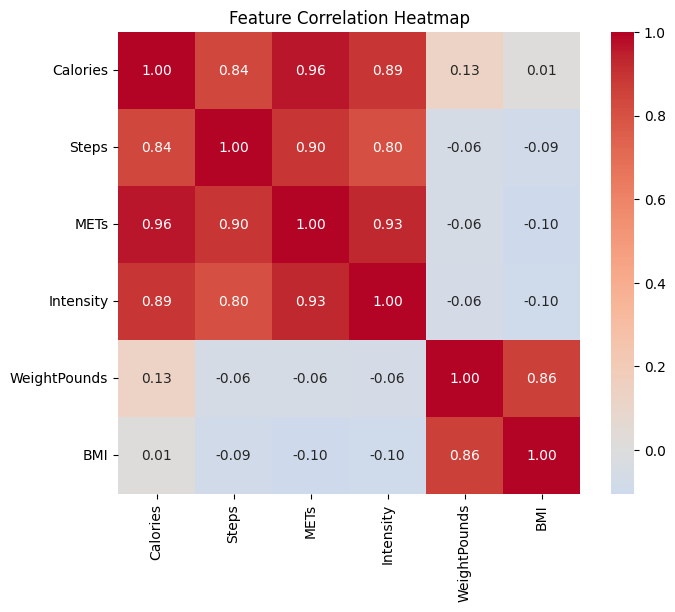

In [18]:
import seaborn as sns
corr = calories_merged_df[
    ['Calories','Steps','METs','Intensity','WeightPounds','BMI']
].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,        # show correlation values
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Feature Correlation Heatmap")
plt.show()

## 1.3 Make up dataset for sleep status

In [37]:
# ensure datetime
raw_hr_sec_df['Time'] = pd.to_datetime(raw_hr_sec_df['Time'])

# drill up to minute
raw_hr_sec_df['ActivityMinute'] = raw_hr_sec_df['Time'].dt.floor('min')

# aggregate
hr_min_df = (
    raw_hr_sec_df.groupby(['Id', 'ActivityMinute'])['Value']
      .agg(
          min_hr='min',
          max_hr='max',
          avg_hr='mean'
      )
      .reset_index()
)

In [38]:
raw_intensities_min_df['ActivityMinute'] = pd.to_datetime(
    raw_intensities_min_df['ActivityMinute']
)

raw_mets_min_df['ActivityMinute'] = pd.to_datetime(
    raw_mets_min_df['ActivityMinute']
)

raw_sleep_min_df['date'] = pd.to_datetime(
    raw_sleep_min_df['date'],
    format='%m/%d/%Y %I:%M:%S %p'
)

In [39]:
sleep_status_df = hr_min_df.merge(
    raw_intensities_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_mets_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_sleep_min_df,
    left_on=['Id', 'ActivityMinute'],
    right_on=['Id', 'date'],
    how='left'
)


In [40]:
# sleep_status_df.dropna(subset=['value'], inplace=True)
sleep_status_df.drop(columns=['date'], inplace=True)
sleep_status_df.isna().sum()

,0
Id,0
ActivityMinute,0
min_hr,0
max_hr,0
avg_hr,0
Intensity,323
METs,323
value,407656
logId,407656


In [24]:
# Forward fill weight-related columns by user
# cols_to_fill = ['Intensity', 'METs']

# sleep_status_df[cols_to_fill] = (
#     sleep_status_df
#         .groupby('Id')[cols_to_fill]
#         .transform(lambda x: x.ffill().bfill())
# )

In [41]:
sleep_status_df.isna().sum()

,0
Id,0
ActivityMinute,0
min_hr,0
max_hr,0
avg_hr,0
Intensity,323
METs,323
value,407656
logId,407656


In [42]:
# Sort by value
sleep_status_df = sleep_status_df.sort_values(['Id', 'ActivityMinute'], ascending=True)

# Remove duplicated data
sleep_status_df = sleep_status_df.drop_duplicates(subset=['Id', 'ActivityMinute'])

# Check minute-level time continuity in the dataset
sleep_status_df.groupby('Id')['ActivityMinute'].diff().value_counts().head()

,count
ActivityMinute,
0 days 00:01:00,469997
0 days 00:02:00,281
0 days 00:03:00,194
0 days 00:04:00,130
0 days 00:05:00,93


In [48]:
# Split into contiguous segments (per user)
df['time_diff'] = (
    df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

EXPECTED_INTERVAL = 60   # second
THRESHOLD = 180

df['new_segment'] = (
    (df['time_diff'] > THRESHOLD) |
    df['time_diff'].isna()
)

df['segment_id'] = (
    df.groupby('Id')['new_segment']
      .cumsum()
)

df['segment_uid'] = (
    df['Id'].astype(str) + '_' +
    df['segment_id'].astype(str)
)

# Filter long segments
segment_stats = (
    df.groupby(['Id', 'segment_uid'])
      .agg(
          start_time=('ActivityMinute', 'min'),
          end_time=('ActivityMinute', 'max'),
          n_points=('ActivityMinute', 'count')
      )
      .reset_index()
)

segment_stats['duration_sec'] = (
    segment_stats['end_time'] - segment_stats['start_time']
).dt.total_seconds()

valid_segments = segment_stats[
    segment_stats['duration_sec'] >= 20 * 60
]

df_long = df.merge(
    valid_segments[['segment_uid']],
    on='segment_uid',
    how='inner'
)

In [49]:
df_long

,Id,ActivityMinute,Calories,Intensity,METs,Steps,WeightPounds,BMI,minute_gap,has_gap,hour,dayofweek,is_weekend,time_diff,new_segment,segment_id,segment_uid
0,1503960366,2016-03-12 00:00:00,1,0,10,0,118,23,NaN,0,0,5,True,NaN,True,1,1503960366_1
1,1503960366,2016-03-12 00:01:00,1,0,10,0,118,23,1,0,0,5,True,60,False,1,1503960366_1
2,1503960366,2016-03-12 00:02:00,1,0,10,0,118,23,1,0,0,5,True,60,False,1,1503960366_1
3,1503960366,2016-03-12 00:03:00,1,0,10,0,118,23,1,0,0,5,True,60,False,1,1503960366_1
4,1503960366,2016-03-12 00:04:00,1,0,10,0,118,23,1,0,0,5,True,60,False,1,1503960366_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017775,8877689391,2016-05-12 13:55:00,1,0,11,0,185,25,1,0,13,3,False,60,False,1,8877689391_1
1017776,8877689391,2016-05-12 13:56:00,1,0,11,0,185,25,1,0,13,3,False,60,False,1,8877689391_1
1017777,8877689391,2016-05-12 13:57:00,1,0,11,0,185,25,1,0,13,3,False,60,False,1,8877689391_1
1017778,8877689391,2016-05-12 13:58:00,1,0,11,0,185,25,1,0,13,3,False,60,False,1,8877689391_1
